# Tasks

[https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf](https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf)

---

# Miniproject 1 
# B.I. Bartificial Intelligence - Image Classifier for *The Simpsons*
![](https://static.wikia.nocookie.net/simpsons/images/8/8c/Treehouse_of_Horror_XVI_%28Promo_Picture%29_2.jpg/revision/latest?cb=20120625110202) |  ![](https://static.wikia.nocookie.net/simpsons/images/a/a9/B.I._Bartificial_Intelligence.jpg/revision/latest?cb=20121103214906)
:---:|:---:

> Authors 🗒
> * Kyra Maag (kyra.maag@ost.ch)
> * Nico Fehr (nico.fehr@ost.ch)

For the first Miniproject we decided to train an image classifier for images of characters from the famous series "The Simpsons". The classifier can detect and predict the character shown on a given image.




## Dataset

In [ ]:
import keras
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
 !kaggle datasets download -d alexattia/the-simpsons-characters-dataset

100% 1.07G/1.08G [00:07<00:00, 196MB/s]
100% 1.08G/1.08G [00:07<00:00, 164MB/s]


In [ ]:
!unzip the-simpsons-characters-dataset.zip

In [ ]:
!mkdir simpsons-dataset
!mv kaggle_simpson_testset simpsons-dataset
!mv simpsons_dataset simpsons-dataset
!mv annotation.txt simpsons-dataset
!mv characters_illustration.png simpsons-dataset
!mv number_pic_char.csv simpsons-dataset
!mv weights.best.hdf5 simpsons-dataset

mkdir: cannot create directory ‘simpsons-dataset’: File exists
mv: cannot stat 'simpsons_dataset': No such file or directory
mv: cannot stat 'annotation.txt': No such file or directory
mv: cannot stat 'characters_illustration.png': No such file or directory
mv: cannot stat 'number_pic_char.csv': No such file or directory
mv: cannot stat 'weights.best.hdf5': No such file or directory


### Pre-Processing

In [ ]:
!ls simpsons-dataset/simpsons_dataset -lah

total 724K
drwxr-xr-x 45 root root 4.0K Mar  6 12:50 .
drwxr-xr-x  4 root root 4.0K Mar  6 12:53 ..
drwxr-xr-x  2 root root  32K Mar  6 12:50 abraham_grampa_simpson
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 agnes_skinner
drwxr-xr-x  2 root root  20K Mar  6 12:50 apu_nahasapeemapetilon
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 barney_gumble
drwxr-xr-x  2 root root  36K Mar  6 12:50 bart_simpson
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 carl_carlson
drwxr-xr-x  2 root root  36K Mar  6 12:50 charles_montgomery_burns
drwxr-xr-x  2 root root  36K Mar  6 12:50 chief_wiggum
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 cletus_spuckler
drwxr-xr-x  2 root root  20K Mar  6 12:50 comic_book_guy
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 disco_stu
drwxr-xr-x  2 root root  20K Mar  6 12:50 edna_krabappel
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 fat_tony
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 gil
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 groundskeeper_willie
drwxr-xr-x  2 root root  68K Mar  6 12:50 

In [ ]:
!rm -r simpsons-dataset/simpsons_dataset/agnes_skinner
!rm -r simpsons-dataset/simpsons_dataset/barney_gumble/
!rm -r simpsons-dataset/simpsons_dataset/carl_carlson/
!rm -r simpsons-dataset/simpsons_dataset/cletus_spuckler/
!rm -r simpsons-dataset/simpsons_dataset/comic_book_guy/
!rm -r simpsons-dataset/simpsons_dataset/disco_stu/
!rm -r simpsons-dataset/simpsons_dataset/edna_krabappel/
!rm -r simpsons-dataset/simpsons_dataset/fat_tony/
!rm -r simpsons-dataset/simpsons_dataset/gil/
!rm -r simpsons-dataset/simpsons_dataset/groundskeeper_willie/
!rm -r simpsons-dataset/simpsons_dataset/kent_brockman/
!rm -r simpsons-dataset/simpsons_dataset/lenny_leonard/
!rm -r simpsons-dataset/simpsons_dataset/lionel_hutz/
!rm -r simpsons-dataset/simpsons_dataset/martin_prince/
!rm -r simpsons-dataset/simpsons_dataset/mayor_quimby/
!rm -r simpsons-dataset/simpsons_dataset/miss_hoover/
!rm -r simpsons-dataset/simpsons_dataset/nelson_muntz/
!rm -r simpsons-dataset/simpsons_dataset/otto_mann/
!rm -r simpsons-dataset/simpsons_dataset/patty_bouvier/
!rm -r simpsons-dataset/simpsons_dataset/professor_john_frink/
!rm -r simpsons-dataset/simpsons_dataset/rainier_wolfcastle/
!rm -r simpsons-dataset/simpsons_dataset/ralph_wiggum/
!rm -r simpsons-dataset/simpsons_dataset/selma_bouvier/
!rm -r simpsons-dataset/simpsons_dataset/sideshow_mel/
!rm -r simpsons-dataset/simpsons_dataset/snake_jailbird/
!rm -r simpsons-dataset/simpsons_dataset/troy_mcclure/
!rm -r simpsons-dataset/simpsons_dataset/waylon_smithers/


In [ ]:
!rm -r simpsons-dataset/train/maggie_simpson/

In [ ]:
ls -lah simpsons-dataset/simpsons_dataset/

total 540K
drwxr-xr-x 17 root root 4.0K Mar  6 13:35 ./
drwxr-xr-x  4 root root 4.0K Mar  6 12:53 ../
drwxr-xr-x  2 root root  32K Mar  6 12:50 abraham_grampa_simpson/
drwxr-xr-x  2 root root  20K Mar  6 12:50 apu_nahasapeemapetilon/
drwxr-xr-x  2 root root  36K Mar  6 12:50 bart_simpson/
drwxr-xr-x  2 root root  36K Mar  6 12:50 charles_montgomery_burns/
drwxr-xr-x  2 root root  36K Mar  6 12:50 chief_wiggum/
drwxr-xr-x  2 root root  68K Mar  6 12:50 homer_simpson/
drwxr-xr-x  2 root root  36K Mar  6 12:50 krusty_the_clown/
drwxr-xr-x  2 root root  36K Mar  6 12:50 lisa_simpson/
drwxr-xr-x  2 root root 4.0K Mar  6 12:50 maggie_simpson/
drwxr-xr-x  2 root root  36K Mar  6 12:50 marge_simpson/
drwxr-xr-x  2 root root  36K Mar  6 12:50 milhouse_van_houten/
drwxr-xr-x  2 root root  44K Mar  6 12:50 moe_szyslak/
drwxr-xr-x  2 root root  44K Mar  6 12:50 ned_flanders/
drwxr-xr-x  2 root root  36K Mar  6 12:50 principal_skinner/
drwxr-xr-x  2 root root  32K Mar  6 12:50 sideshow_bob/


### Source

https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset

The dataset used in this miniproject was available on kaggle.com. The dataset contains 20 folders (one per each character in the series) with around 400-2000 images in each one. 



## Key characteristics

## Architecture 1 (simple, underfitted)

### Tasks
* [ ] Define and train deep convolutional network (multi-class) with keras
* [ ] Not more than 3 layers, no more than 5'000 trainable parameters
* [ ] Network should underfit
* [ ] Plot loss and accuracy evolvement
* [ ] sufficient nr of epochs
* [ ] training loss should converge
* [ ] Plot confusion matrix
* [ ] Discussion

In [9]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [10]:
classification_labels = ["Bart Simpson",
          "Charles Montgomery Burns",
          "Homer Simpson",
          "Krusty The Clown",
          "Lisa Simpson",
          "Marge Simpson",
          "Moe Szyslak",
          "Ned Flanders",]

In [11]:
train_directory = 'simpsons-dataset/train'
test_directory = 'simpsons-dataset/test'

In [71]:
image_size = (50, 50)
batch_size = 128

train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

Found 11538 files belonging to 8 classes.
Using 9231 files for training.
Found 11538 files belonging to 8 classes.
Using 2307 files for validation.


### Exploring the data

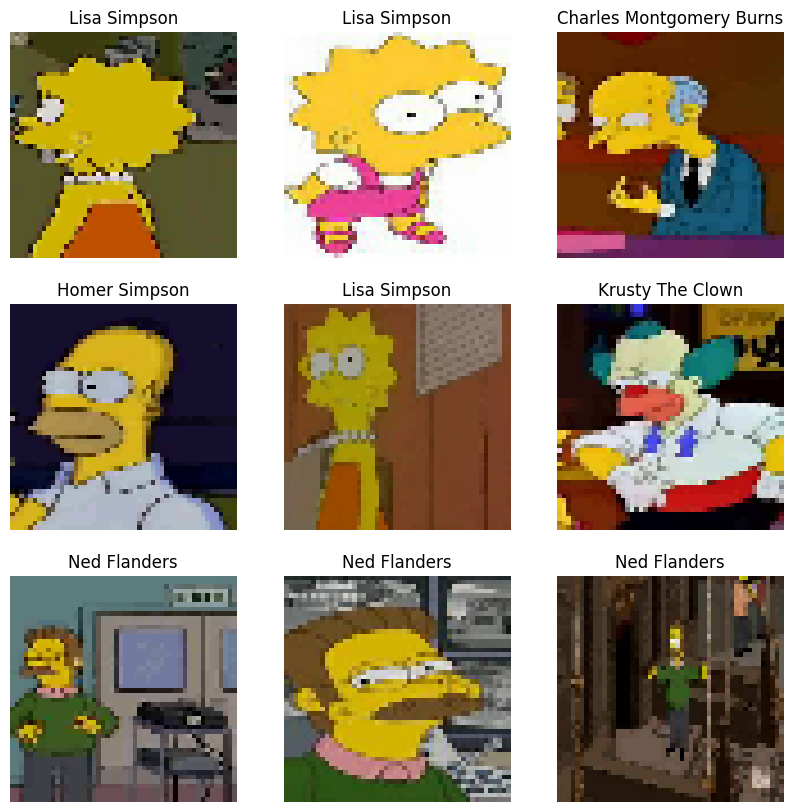

In [72]:
plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(classification_labels[int(labels[i])])
      plt.axis("off")

### Rescaling Layer

Performance

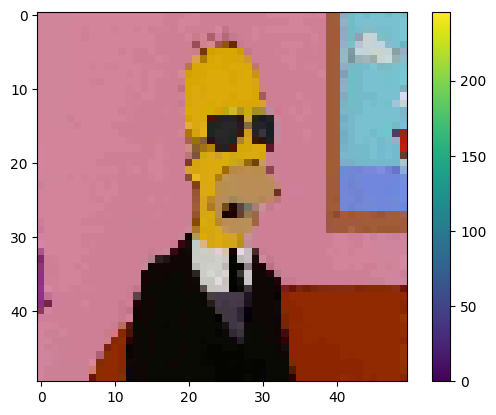

In [74]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

for images, labels in train_data.take(1):
    plt.figure()
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [75]:
input_shape = image_size + (3, )
print(input_shape)
num_classes = len(classification_labels)

(50, 50, 3)


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_55 (Rescaling)    (None, 50, 50, 3)         0         
                                                                 
 conv2d_129 (Conv2D)         (None, 48, 48, 2)         56        
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 24, 24, 2)        0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 22, 22, 5)         95        
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 11, 11, 5)        0         
 ng2D)                                                           
                                                                 
 flatten_36 (Flatten)        (None, 605)             

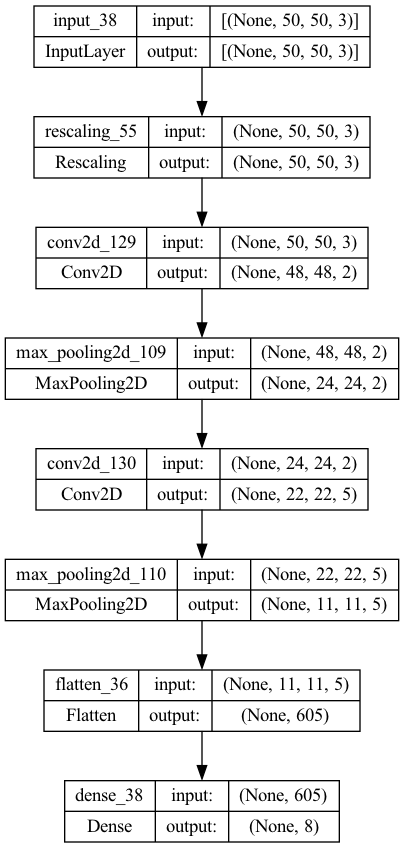

In [105]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Rescaling(1./255),
    layers.Conv2D(2, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(5, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes),
])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

In [103]:
#callbacks = [
#    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
#]

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [104]:
epochs = 25
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    #callbacks=callbacks
)

Epoch 1/25
73/73 [==============================] - 4s 43ms/step - loss: 1.9282 - accuracy: 0.2673 - val_loss: 1.7225 - val_accuracy: 0.3658
Epoch 2/25
73/73 [==============================] - 3s 40ms/step - loss: 1.6091 - accuracy: 0.4196 - val_loss: 1.5321 - val_accuracy: 0.4608
Epoch 3/25
73/73 [==============================] - 3s 41ms/step - loss: 1.4657 - accuracy: 0.4885 - val_loss: 1.4671 - val_accuracy: 0.4915
Epoch 4/25
73/73 [==============================] - 3s 41ms/step - loss: 1.3976 - accuracy: 0.5173 - val_loss: 1.4392 - val_accuracy: 0.4954
Epoch 5/25
73/73 [==============================] - 3s 44ms/step - loss: 1.3538 - accuracy: 0.5360 - val_loss: 1.3971 - val_accuracy: 0.5267
Epoch 6/25
73/73 [==============================] - 3s 42ms/step - loss: 1.3243 - accuracy: 0.5483 - val_loss: 1.3686 - val_accuracy: 0.5457
Epoch 7/25
73/73 [==============================] - 3s 41ms/step - loss: 1.2943 - accuracy: 0.5651 - val_loss: 1.3375 - val_accuracy: 0.5561
Epoch 8/25
73

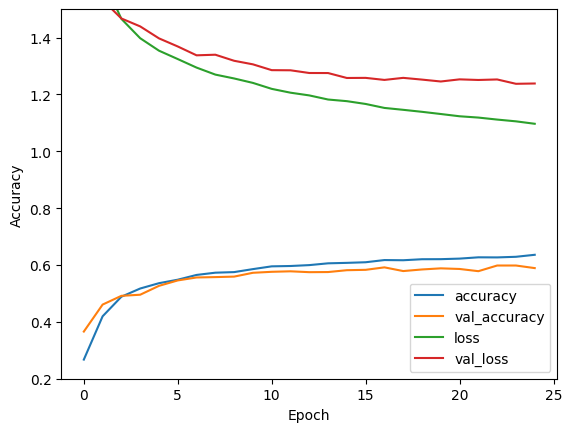

In [111]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1.5])
plt.legend(loc='lower right')

## Architecture 2 (overfitted)
### Tasks

* [ ] Change number of layers, filters (=kernels), number of neurons
* [ ] Make network too complex (overfitting)
* [ ] Plot learning curves 
* [ ] Plot confusion matrix
* [ ] Discussion

## Architecture 2 (optimized)
### Tasks
* [ ] Add dropout layer
* [ ] add L2 regularization to at least one layer [Weight Regularization](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization)
* [ ] K-fold cross-validation (k >= 5) to find optimal L2 regularization parameter value

## Discussion

* [ ] Observations
* [ ] Draw conclusions



### Comparison

Compare 
* nr of parameters
* nr of epochs
* test performance 

